In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from astropy.io import fits

In [2]:
# Open a FITS file
with fits.open('data/acisf00323N003_evt2.fits') as hdul:
    # 'hdul' is a HDUList object containing the FITS file data

    # Print the header information
    hdul.info()

    # Access individual Header Data Units (HDUs)
    for hdu in hdul:
        # Print header information for each HDU
        print(hdu.header)

        # Access data in the HDU (e.g., image data)
    
    data = hdul[1].data

# You can now work with the header information and data in Python

Filename: data/acisf00323N003_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   ()      
  1  EVENTS        1 BinTableHDU    823   567579R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   2R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   2R x 2C   [1D, 1D]   
  4  GTI           6 BinTableHDU     28   2R x 2C   [1D, 1D]   
  5  GTI           3 BinTableHDU     28   2R x 2C   [1D, 1D]   
  6  GTI           8 BinTableHDU     28   1R x 2C   [1D, 1D]   
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    0 / number of data axes                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined i

In [3]:
data

FITS_rec([(65267597.95025716, 7, 1,     3, 368, 159, 4285, 1861, 4247.166 , 4462.4814, 4494.551 , 4058.9636, 1172, 1177,  5629.1094,  386, 22, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (65267597.95025716, 7, 0,     3, 231, 235, 4148, 1937, 4109.892 , 4386.3926, 4386.318 , 4172.627 , 2138, 2145,  9770.184 ,  670, 80, 6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          (65267597.95025716, 7, 0,     3, 238, 241, 4155, 1943, 4117.1387, 4380.5283, 4382.469 , 4164.136 ,  389,  392,  1842.8567,  127, 16, 4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
          ...,
          (65320653.23387672, 3, 2, 16373, 613, 118, 5014, 3674, 4973.928 , 2651.0417, 2925.7163, 2897.2717, 3468, 3468, 14124.432 ,  968, 16, 4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
     

In [4]:
chipx = data['chipx'].byteswap().newbyteorder()
chipy = data['chipy'].byteswap().newbyteorder()
energy = data['energy'].byteswap().newbyteorder()
time = data['time'].byteswap().newbyteorder()

# Create a DataFrame
df = pd.DataFrame({'chipx': chipx, 'chipy': chipy, 'energy':energy, 'time':time})

In [5]:
df

,chipx,chipy,energy,time
0,368,159,5629.109375,6.526760e+07
1,231,235,9770.183594,6.526760e+07
2,238,241,1842.856689,6.526760e+07
3,844,251,10637.399414,6.526760e+07
4,452,261,936.276733,6.526760e+07
...,...,...,...,...
567574,145,435,8848.759766,6.532065e+07
567575,266,22,3280.805664,6.532065e+07
567576,613,118,14124.431641,6.532065e+07
567577,634,163,9700.466797,6.532065e+07


In [6]:
df.describe()

,chipx,chipy,energy,time
count,567579.000000,567579.000000,567579.000000,5.675790e+05
mean,461.538154,512.706895,6581.630859,6.529410e+07
std,274.392477,260.716507,6052.222168,1.512205e+04
min,2.000000,2.000000,148.954926,6.526760e+07
25%,249.000000,320.000000,879.944733,6.528120e+07
50%,405.000000,513.000000,3725.778076,6.529448e+07
75%,678.000000,701.000000,12635.695801,6.530696e+07
max,1023.000000,1023.000000,19144.949219,6.532065e+07


In [7]:
max_chipx = df['chipx'].max()
max_chipy = df['chipy'].max()

print(max_chipx, max_chipy)

1023 1023


In [8]:
# bound data on energy within 0.5-2 keV 

lower_bound = 500
upper_bound = 2000
frames_nb = 220000


bounded_data = df[(lower_bound <= df['energy']) & (df['energy']<= upper_bound)].reset_index(drop=True)
bounded_data.shape

(226709, 4)

In [9]:
#res_data = bounded_data.iloc[:frames_nb, :]
res_data = bounded_data

In [10]:
res_data

,chipx,chipy,energy,time
0,238,241,1842.856689,6.526760e+07
1,452,261,936.276733,6.526760e+07
2,244,388,800.045044,6.526760e+07
3,296,435,844.540344,6.526760e+07
4,521,453,670.570679,6.526760e+07
...,...,...,...,...
226704,220,689,887.840454,6.532065e+07
226705,130,756,1019.207764,6.532065e+07
226706,431,868,1302.469482,6.532065e+07
226707,392,103,1982.575806,6.532065e+07


In [11]:
duration = np.max(res_data.time) - np.min(res_data.time)
duration

53055.242579557

In [12]:
res_frame = np.zeros((max_chipx+1, max_chipy+1))

for i in range(res_data.shape[0]):
    res_frame[res_data.chipx[i], res_data.chipy[i]] += res_data.energy[i]

res_frame /= duration

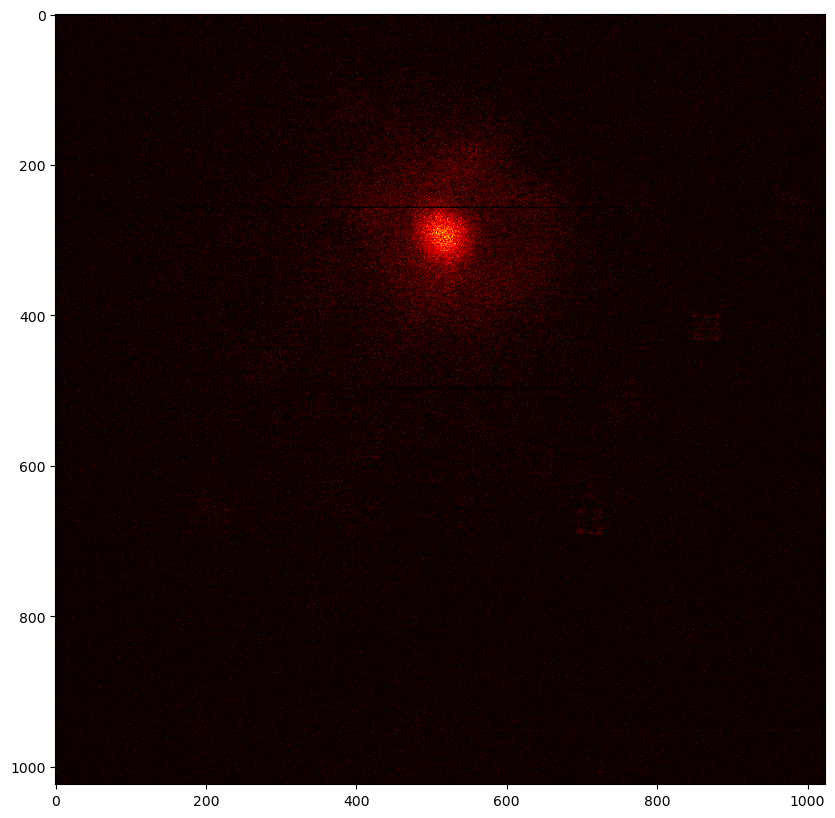

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.imshow(res_frame, cmap='hot')